#**STEP 1: Importing Required Libraries**

In [2]:
# 1. Data Manipulation
import numpy as np           # For numerical operations (e.g., arrays, math)
import pandas as pd          # For data handling, cleaning, and analysis

# 2. Data Visualization
import matplotlib.pyplot as plt       # To plot charts (line, bar, etc.)
import seaborn as sns                 # To make beautiful visualizations

# 3. Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose  # Trend, seasonality extraction
from statsmodels.tsa.arima.model import ARIMA            # ARIMA modeling
from sklearn.model_selection import train_test_split
# 4. Deep Learning Model (LSTM)
from tensorflow.keras.models import Sequential           # Sequential model builder
from tensorflow.keras.layers import Dense, LSTM ,GRU, Dense, Dropout        # LSTM layer, Dense output layer
from sklearn.preprocessing import MinMaxScaler           # To scale data between 0 and 1

# 5. Model Evaluation
from sklearn.metrics import mean_squared_error           # For evaluating prediction error
from math import sqrt                                     # For RMSE (root mean squared error)

# 6. Download Stock Data
import yfinance as yf                                     # To fetch historical stock data

# 7. Warnings Filter
import warnings
warnings.filterwarnings("ignore")                        # Hide warning messages (optional)


# **STEP 2: Data Collection and Preprocessing**

In [3]:
# List of stock tickers (you can replace these with any 4 of your choice)
tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL']

# Define the time range for historical data
start_date = '2015-01-01'
end_date = '2024-12-31'
stock_data = {}

# Loop through each ticker and download data
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    stock_data[ticker] = data
    print(f"✅ Downloaded data for {ticker}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Downloaded data for AAPL
✅ Downloaded data for AMZN


[*********************100%***********************]  1 of 1 completed


✅ Downloaded data for MSFT


[*********************100%***********************]  1 of 1 completed

✅ Downloaded data for GOOGL


In [4]:
stock_data['AAPL'].head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857311,24.915073,24.148625,24.266371,237458000


In [5]:
stock_data['MSFT'].head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2015-01-02,39.998707,40.563274,39.810520,39.913168,27913900
2015-01-05,39.630878,39.973038,39.562445,39.665092,39673900
2015-01-06,39.049202,39.990145,38.955107,39.673647,36447900
2015-01-07,39.545338,39.742080,38.912340,39.331487,29114100
2015-01-08,40.708679,40.845544,39.964479,39.990140,29645200


In [6]:
stock_data['AMZN'].head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2015-01-02,15.4260,15.7375,15.3480,15.6290,55664000
2015-01-05,15.1095,15.4190,15.0425,15.3505,55484000
2015-01-06,14.7645,15.1500,14.6190,15.1120,70380000
2015-01-07,14.9210,15.0640,14.7665,14.8750,52806000
2015-01-08,15.0230,15.1570,14.8055,15.0160,61768000


In [7]:
stock_data['GOOGL'].tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-12-23,194.171051,194.639944,189.701604,192.165781,25675000
2024-12-24,195.647552,195.647552,193.323045,194.380543,10403300
2024-12-26,195.138763,196.286046,193.921639,194.689812,12046600
2024-12-27,192.305450,194.859427,190.200425,194.490289,18891400
2024-12-30,190.789032,192.095940,188.674021,189.352425,14264700


In [8]:
# Create a new DataFrame with only closing prices for each stock
closing_prices = pd.DataFrame()

for ticker in tickers:
    closing_prices[ticker] = stock_data[ticker]['Close']

# Show top 5 rows
closing_prices.head()


,AAPL,AMZN,MSFT,GOOGL
Date,,,,
2015-01-02,24.288580,15.4260,39.998707,26.319654
2015-01-05,23.604336,15.1095,39.630878,25.818157
2015-01-06,23.606556,14.7645,39.049202,25.180983
2015-01-07,23.937572,14.9210,39.545338,25.106926
2015-01-08,24.857311,15.0230,40.708679,25.194403


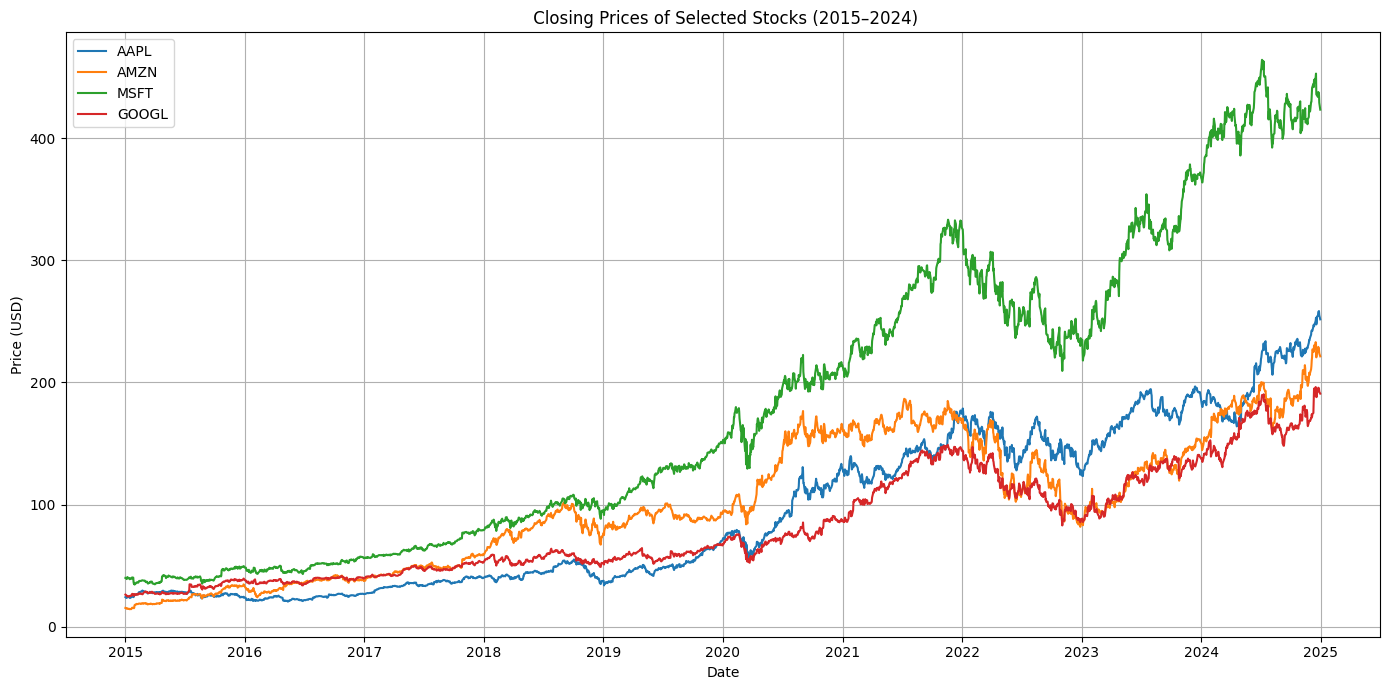

In [9]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(closing_prices[ticker], label=ticker)

plt.title(' Closing Prices of Selected Stocks (2015–2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#**STEP 3 : Exploratory Data Analysis (EDA)**

## Checking for the missing the values

In [10]:
for ticker, df in stock_data.items():
    print(f"Missing Values for {ticker}:")
    print(df.isnull().sum())
    print('-' * 50)

Missing Values for AAPL:
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64
--------------------------------------------------
Missing Values for AMZN:
Price   Ticker
Close   AMZN      0
High    AMZN      0
Low     AMZN      0
Open    AMZN      0
Volume  AMZN      0
dtype: int64
--------------------------------------------------
Missing Values for MSFT:
Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64
--------------------------------------------------
Missing Values for GOOGL:
Price   Ticker
Close   GOOGL     0
High    GOOGL     0
Low     GOOGL     0
Open    GOOGL     0
Volume  GOOGL     0
dtype: int64
--------------------------------------------------


##Correlation Heatmap for Each Stock

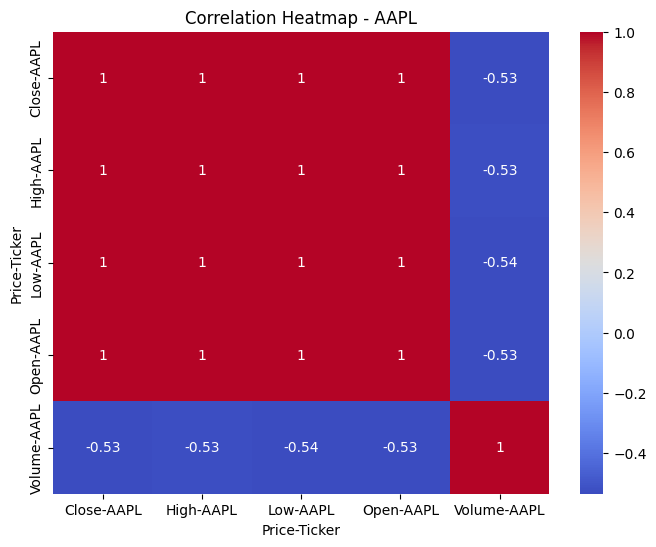

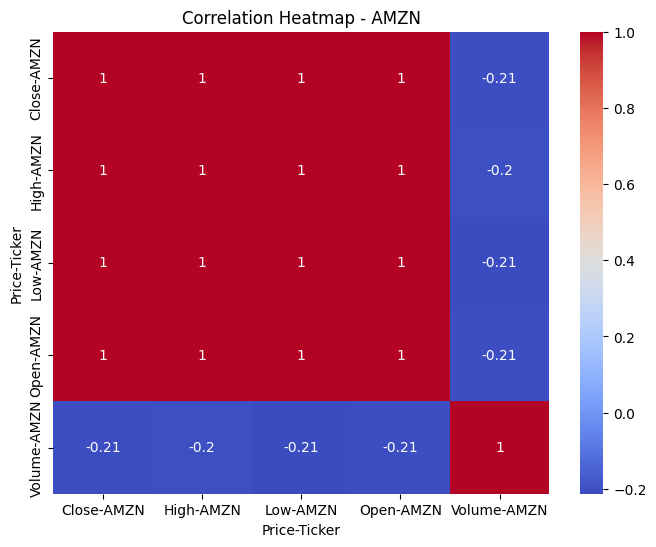

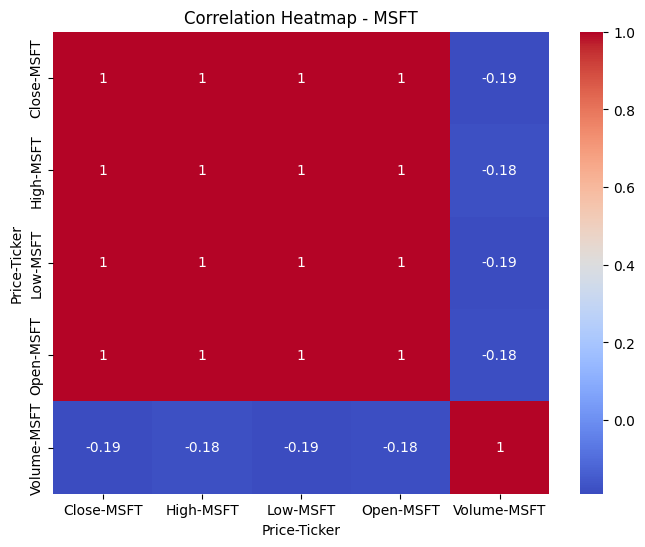

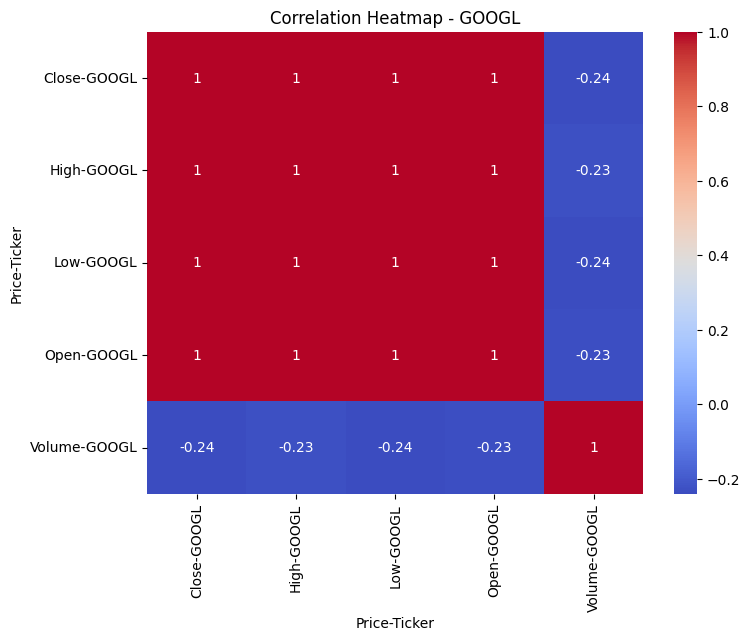

In [11]:
for ticker, df in stock_data.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap - {ticker}')
    plt.show()

##Seasonal Decomposition or seasonal stock decomposition


===== Decomposition for AAPL Stock =====


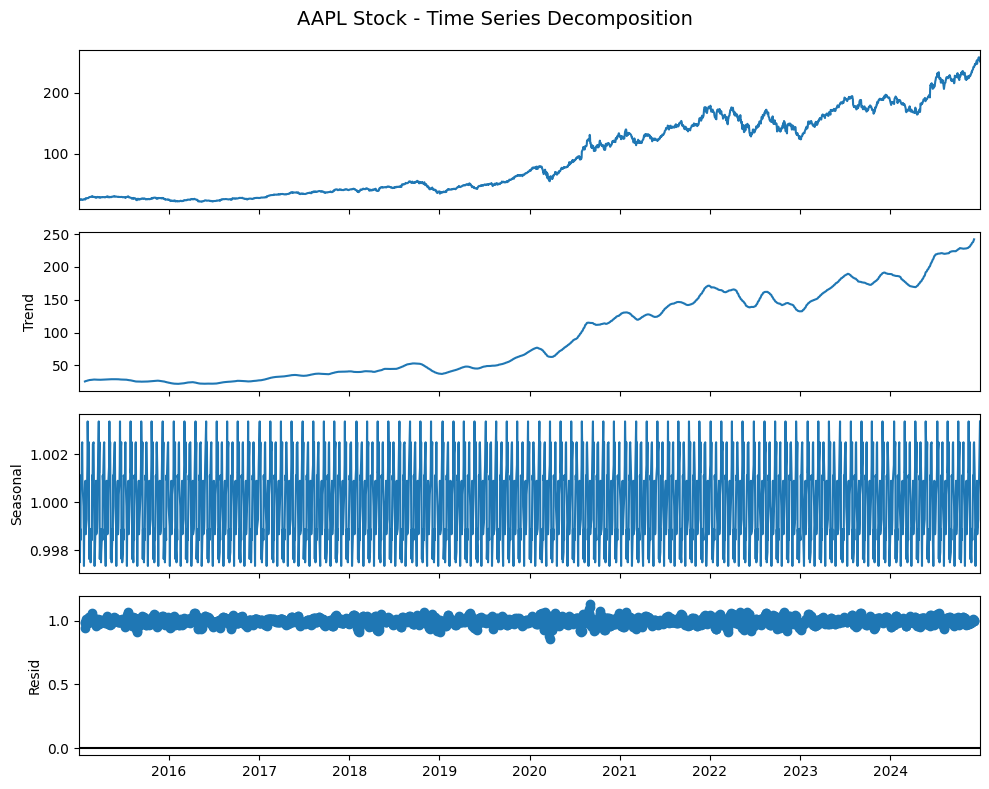


===== Decomposition for AMZN Stock =====


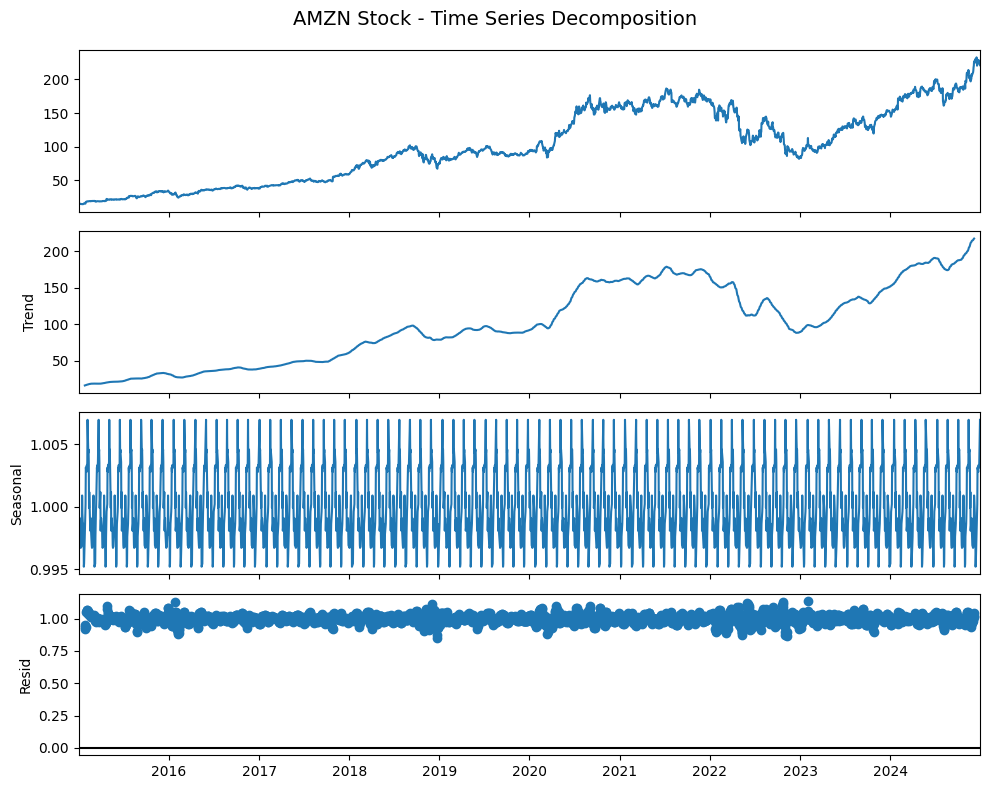


===== Decomposition for MSFT Stock =====


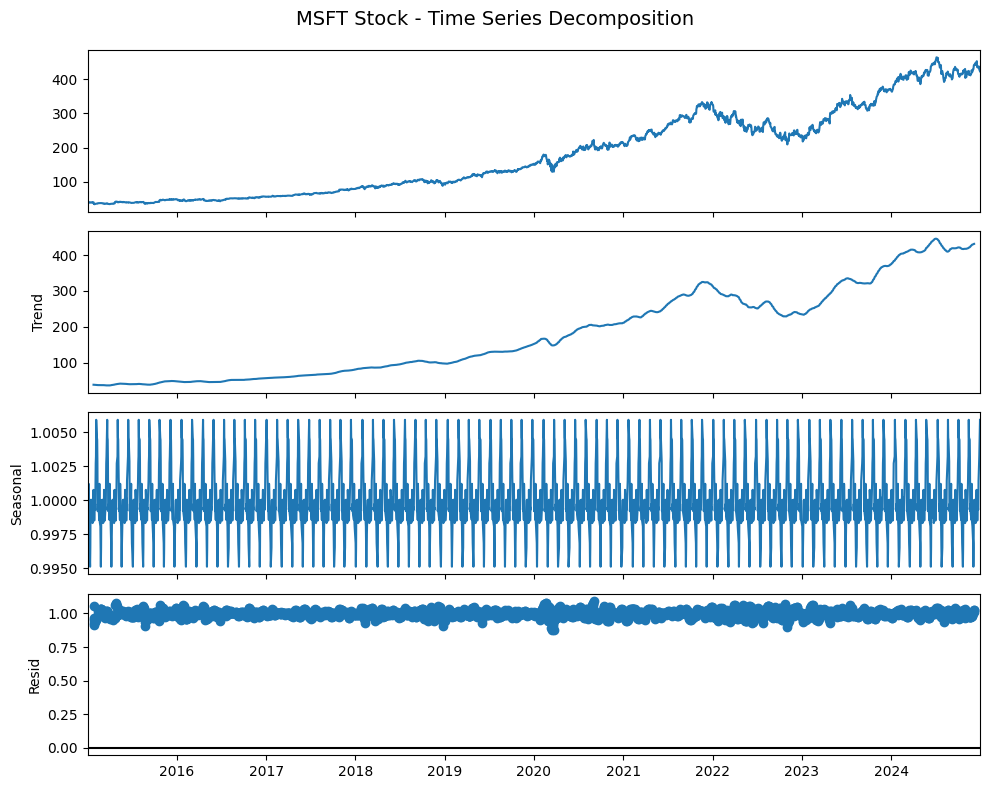


===== Decomposition for GOOGL Stock =====


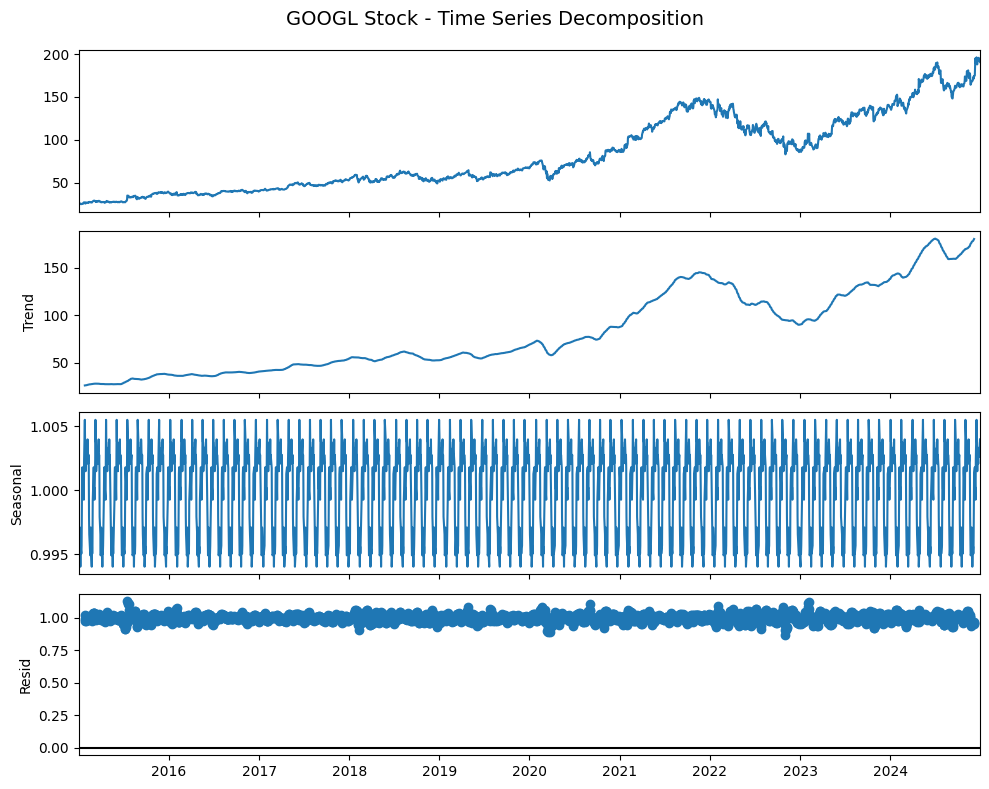

In [12]:

for name, df in stock_data.items():
    print(f"\n===== Decomposition for {name} Stock =====")
    ts = df['Close'].dropna()
    result = seasonal_decompose(ts, model='multiplicative', period=30)
    fig = result.plot()
    fig.set_size_inches(10, 8)
    fig.suptitle(f"{name} Stock - Time Series Decomposition", fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()


#**Step 4: Data Preprocessing & Feature Scaling for Stock Price Prediction**

In [13]:
scaled_stock_data = {}
scaler = MinMaxScaler(feature_range=(0, 1))

for name, df in stock_data.items():
    close_prices = df[['Close']]
    scaled_data = scaler.fit_transform(close_prices)
    scaled_df = pd.DataFrame(scaled_data, columns=['Scaled_Close'], index=df.index)
    result_df = pd.concat([df, scaled_df], axis=1)
    scaled_stock_data[name] = result_df
    print(result_df.head())

            (Close, AAPL)  (High, AAPL)  ...  (Volume, AAPL)  Scaled_Close
Date                                     ...                              
2015-01-02      24.288580     24.757334  ...       212818400      0.015315
2015-01-05      23.604336     24.137516  ...       257142000      0.012437
2015-01-06      23.606556     23.866481  ...       263188400      0.012446
2015-01-07      23.937572     24.037543  ...       160423600      0.013839
2015-01-08      24.857311     24.915073  ...       237458000      0.017707

[5 rows x 6 columns]
            (Close, AMZN)  (High, AMZN)  ...  (Volume, AMZN)  Scaled_Close
Date                                     ...                              
2015-01-02        15.4260       15.7375  ...        55664000      0.004934
2015-01-05        15.1095       15.4190  ...        55484000      0.003486
2015-01-06        14.7645       15.1500  ...        70380000      0.001908
2015-01-07        14.9210       15.0640  ...        52806000      0.002624
201

#**Step 5: Create Sequences for Time Series Forecasting**

In [14]:
window_size = 60
X_data = {}
y_data = {}

for stock, df in scaled_stock_data.items():
    scaled_values = df['Scaled_Close'].values
    X, y = [], []
    for i in range(window_size, len(scaled_values)):
        X.append(scaled_values[i - window_size:i])
        y.append(scaled_values[i])
    X_data[stock] = np.array(X).reshape(-1, window_size, 1)
    y_data[stock] = np.array(y)


#**Step 6 : Train-Test Split for All Stocks**

In [15]:
X_train_data = {}
X_test_data = {}
y_train_data = {}
y_test_data = {}

for stock in X_data.keys():
    X_train, X_test, y_train, y_test = train_test_split(
        X_data[stock], y_data[stock],
        train_size=0.8, test_size=0.2,
        random_state=10
    )
    X_train_data[stock] = X_train
    X_test_data[stock] = X_test
    y_train_data[stock] = y_train
    y_test_data[stock] = y_test

#**Step 7: LSTM Forecasting Code**

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


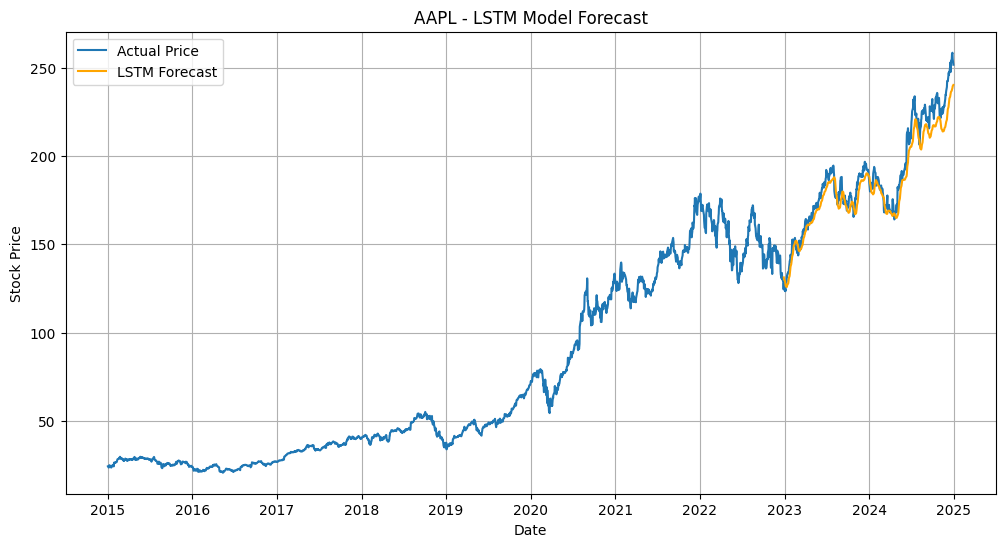

AAPL - LSTM MSE: 67.41
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


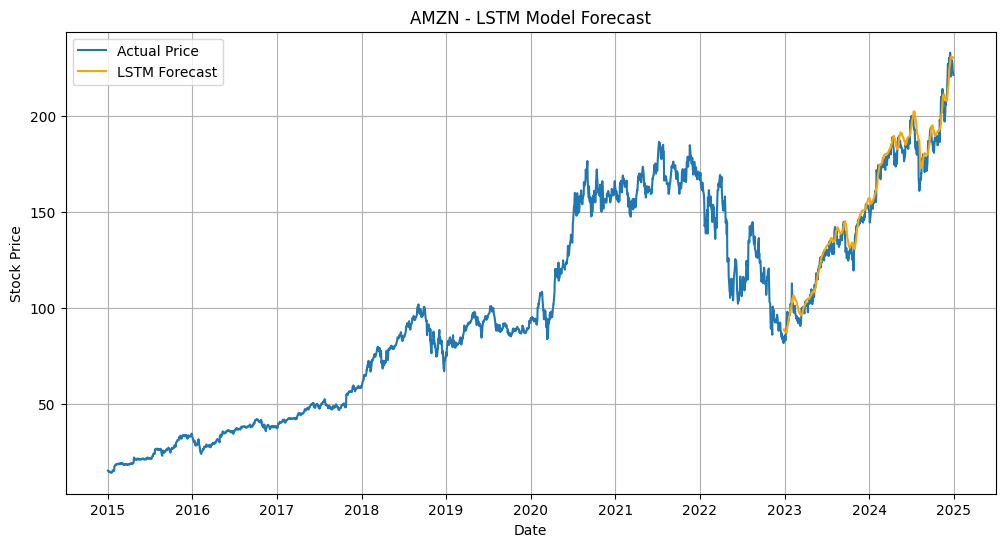

AMZN - LSTM MSE: 34.12
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


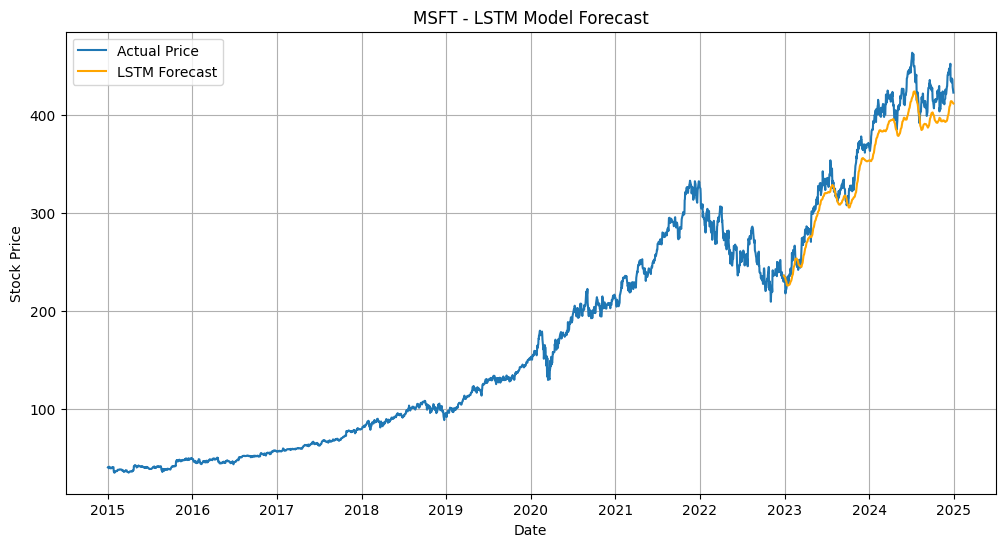

MSFT - LSTM MSE: 470.52
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


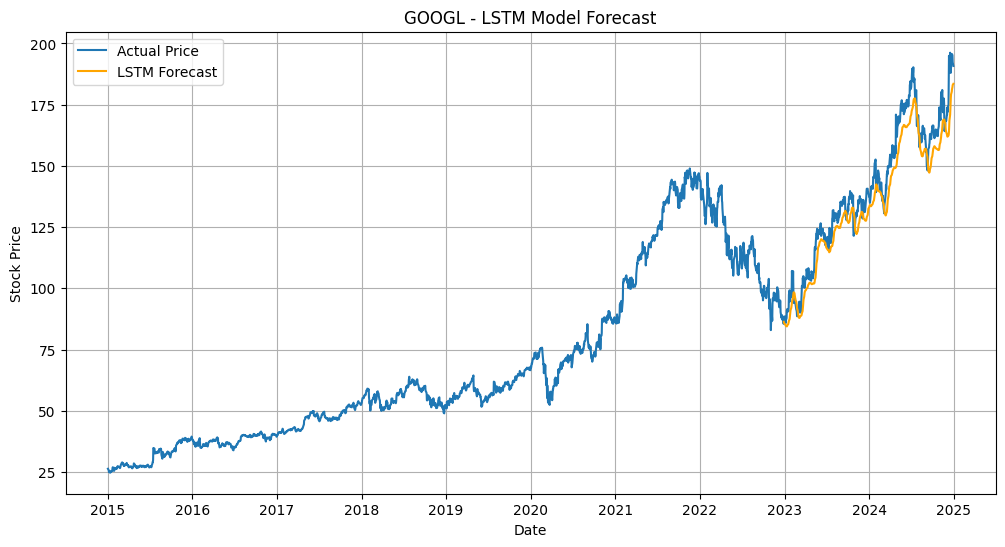

GOOGL - LSTM MSE: 66.85


In [16]:
lstm_forecasts = {}
n_steps = 60

for ticker, df in stock_data.items():
    df = df[['Close']].dropna()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df)

    training_data_len = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:training_data_len]
    test_data = scaled_data[training_data_len - n_steps:]

    X_train = []
    y_train = []
    for i in range(n_steps, len(train_data)):
        X_train.append(train_data[i - n_steps:i, 0])
        y_train.append(train_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    X_test = []
    for i in range(n_steps, len(test_data)):
        X_test.append(test_data[i - n_steps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    predicted_price = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price)

    actual_price = df.iloc[training_data_len:]['Close'].values
    forecast_index = df.iloc[training_data_len:].index[:len(predicted_price)]
    lstm_forecasts[ticker] = pd.Series(predicted_price.flatten(), index=forecast_index)

    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Actual Price')
    plt.plot(lstm_forecasts[ticker], label='LSTM Forecast', color='orange')
    plt.title(f"{ticker} - LSTM Model Forecast")
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    mse = mean_squared_error(actual_price[:len(predicted_price)], predicted_price)
    print(f"{ticker} - LSTM MSE: {mse:.2f}")


#**Step 8 :  ARIMA Model Setup**

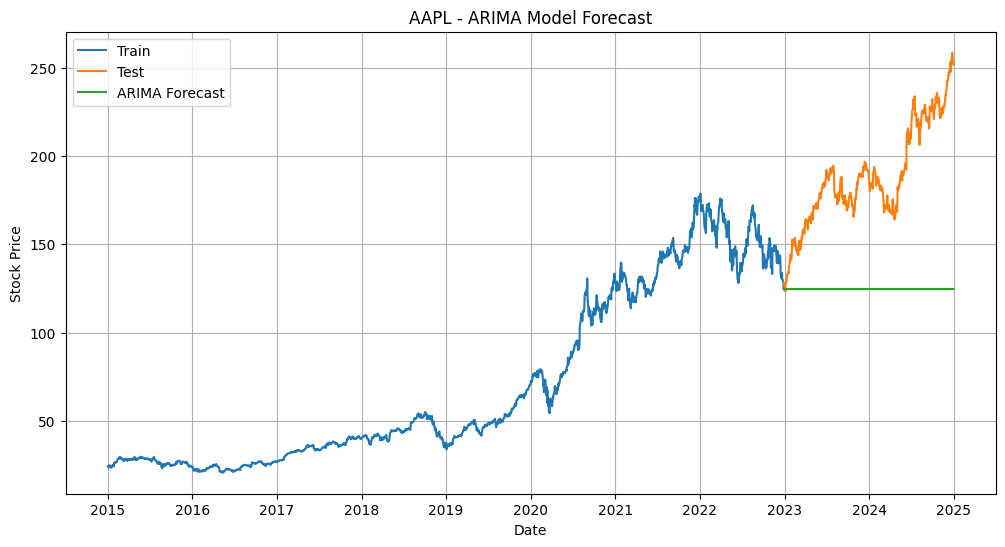

AAPL - ARIMA MSE: 4846.49


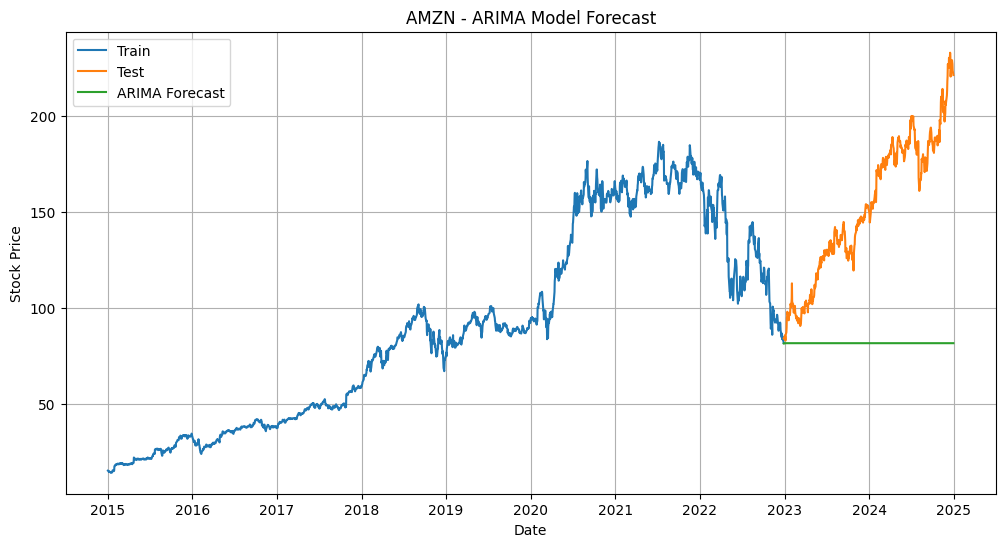

AMZN - ARIMA MSE: 6371.80


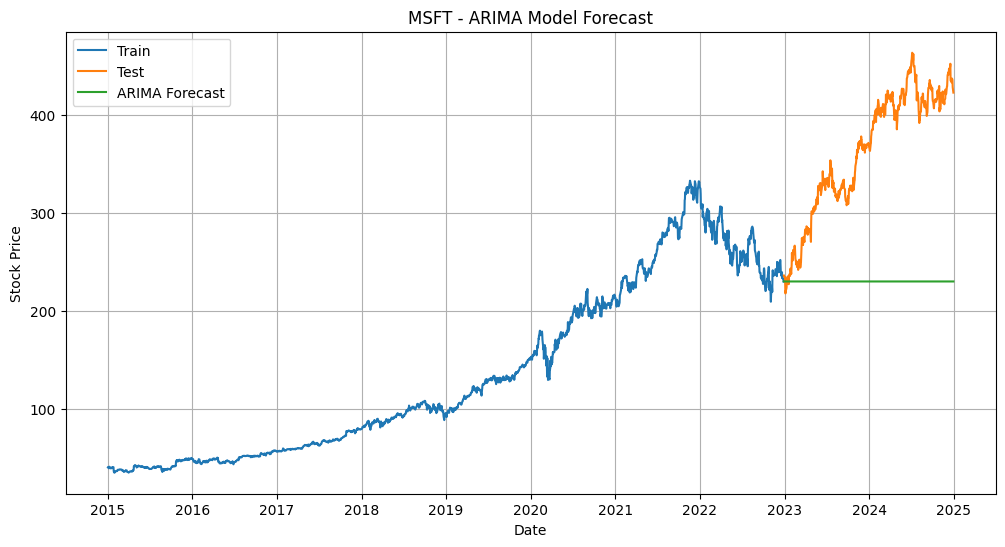

MSFT - ARIMA MSE: 21560.38


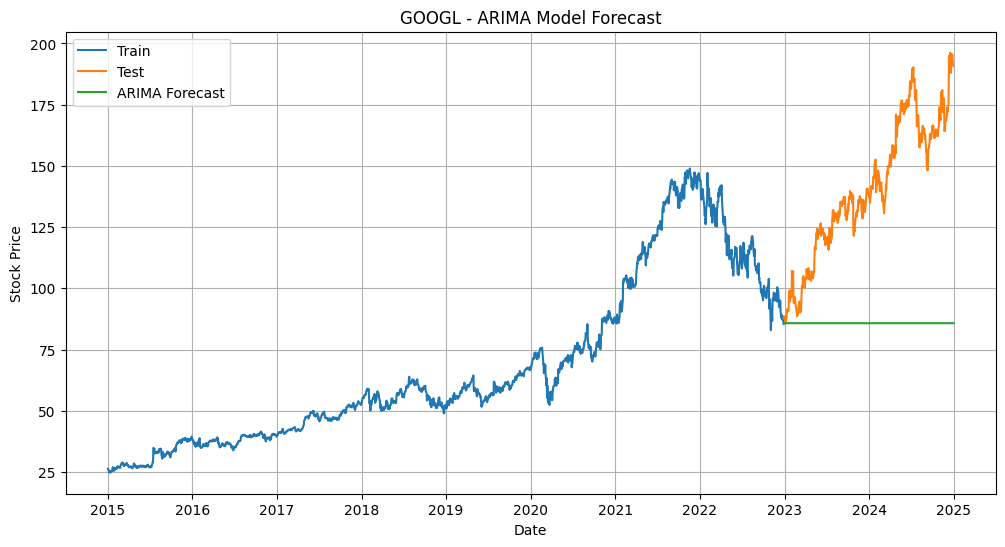

GOOGL - ARIMA MSE: 3736.12


In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

arima_forecasts = {}

for ticker, df in stock_data.items():
    df = df[['Close']].dropna()

    # Ensure index is datetime
    df.index = pd.to_datetime(df.index)

    # Split raw Close price into 80% train, 20% test
    train_size = int(len(df) * 0.8)
    train_arima = df[:train_size]
    test_arima = df[train_size:]

    # Fit ARIMA model
    model = ARIMA(train_arima['Close'], order=(5, 1, 0))
    fitted_model = model.fit()

    # Forecast
    forecast = fitted_model.forecast(steps=len(test_arima))
    forecast.index = test_arima.index

    # Store forecast
    arima_forecasts[ticker] = forecast

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(train_arima['Close'], label='Train')
    plt.plot(test_arima['Close'], label='Test')
    plt.plot(forecast, label='ARIMA Forecast')
    plt.title(f"{ticker} - ARIMA Model Forecast")
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate
    mse = mean_squared_error(test_arima['Close'], forecast)
    print(f"{ticker} - ARIMA MSE: {mse:.2f}")


#**Step 9:Compare ARIMA and LSTM Predictions for Each Stock**

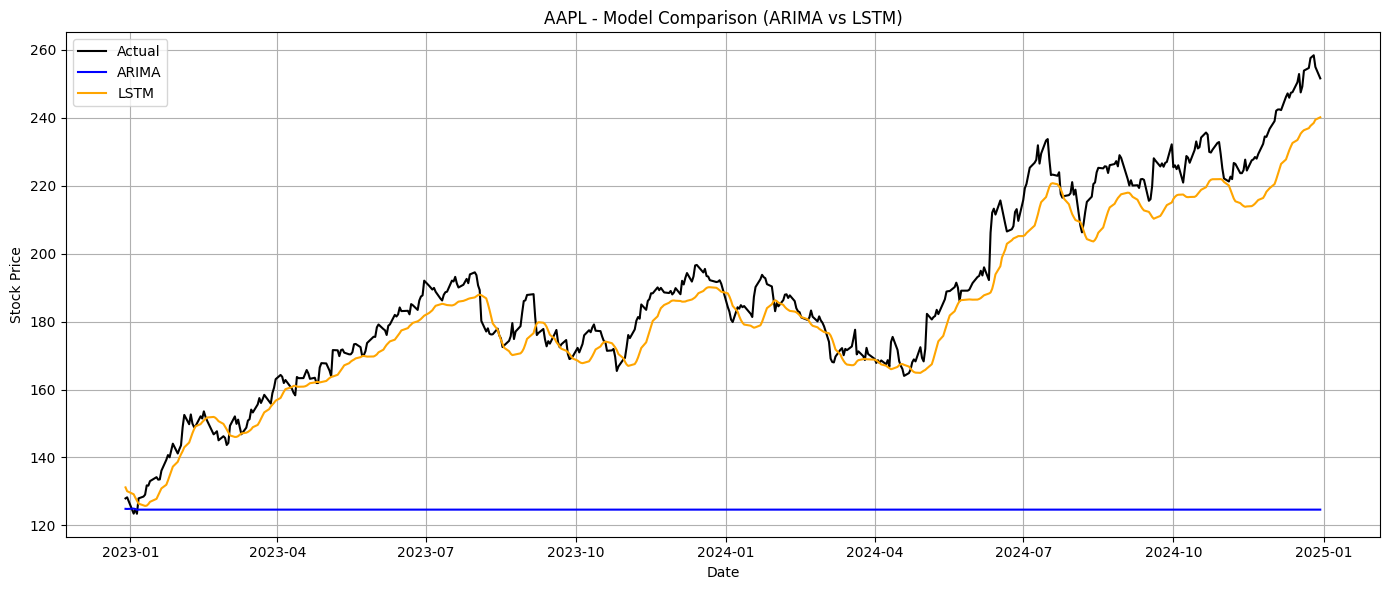

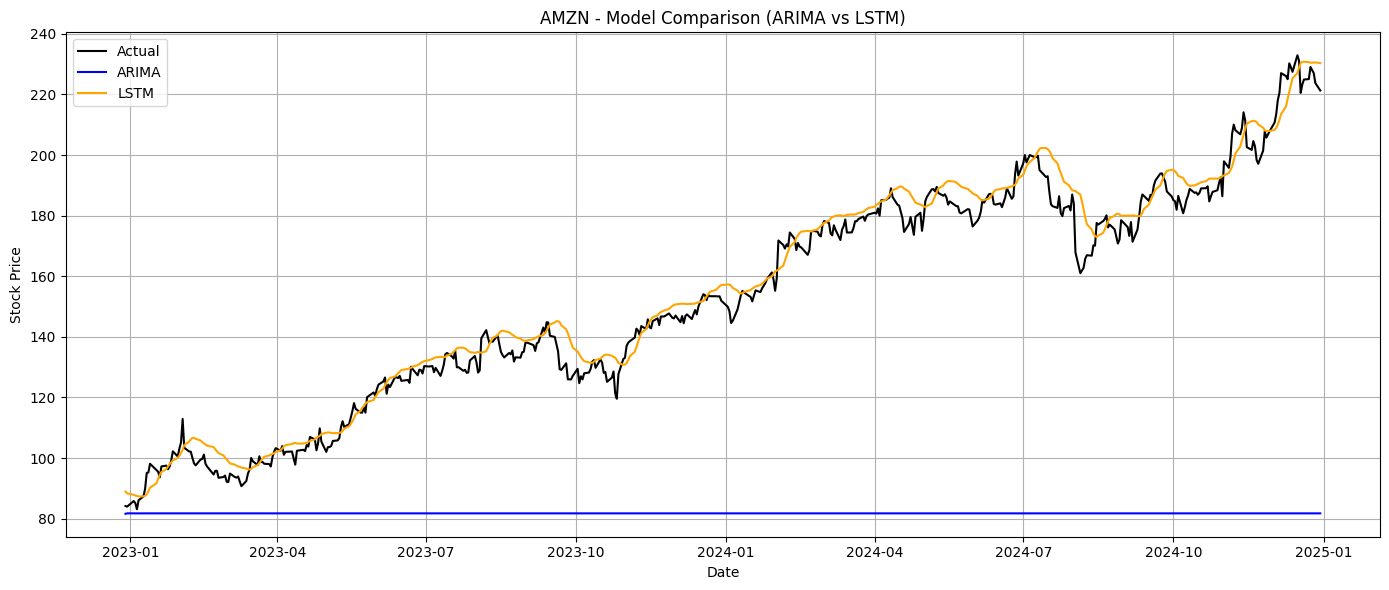

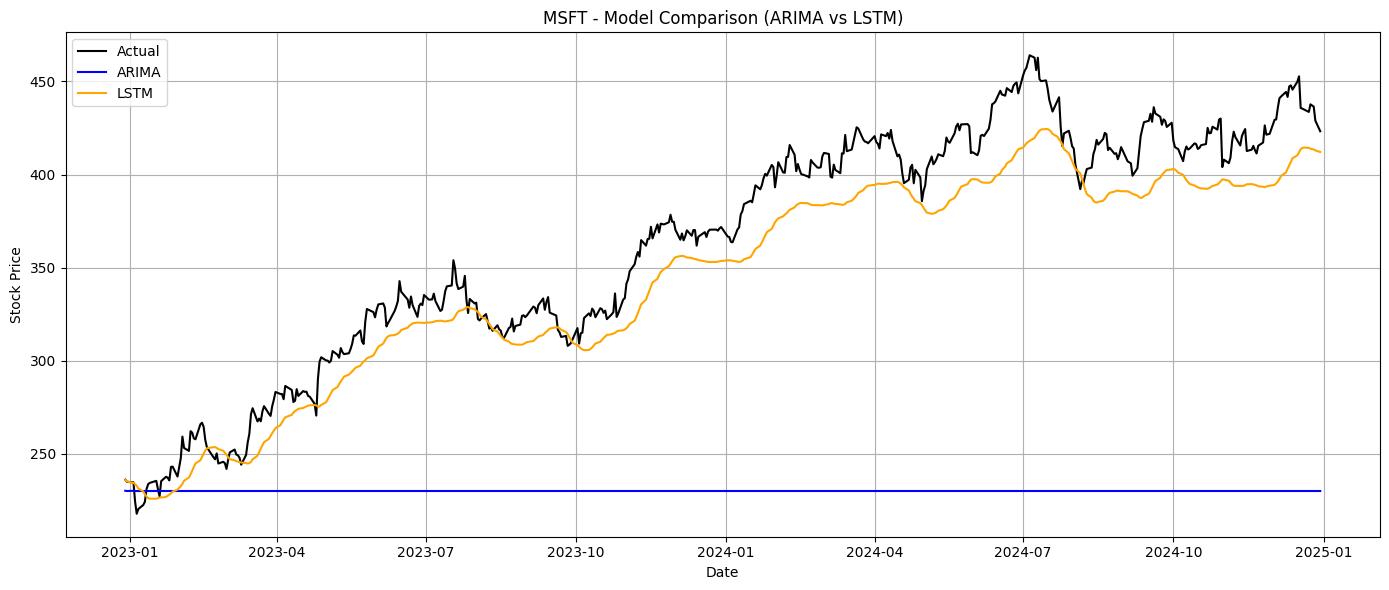

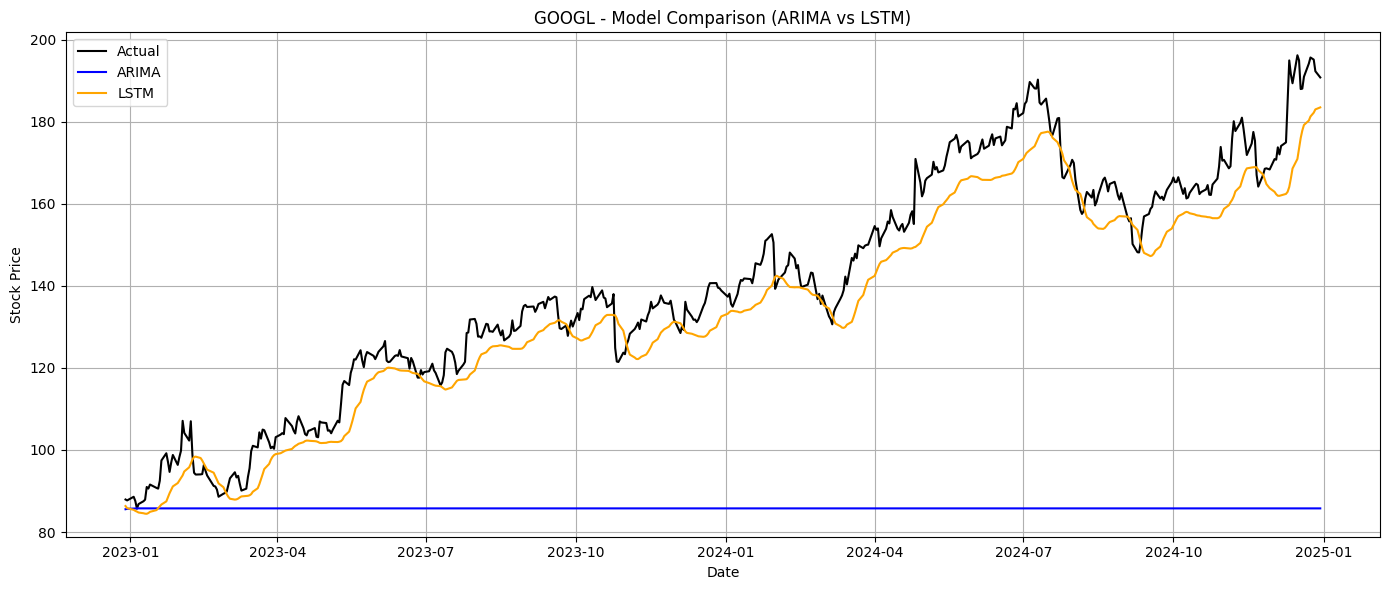

In [18]:
model_comparison = {}
for ticker in stock_data.keys():
    arima_pred = arima_forecasts.get(ticker)
    lstm_pred = lstm_forecasts.get(ticker)
    actual = stock_data[ticker]['Close'].dropna()

    # Align dates for comparison
    arima_common = arima_pred.index.intersection(actual.index)
    lstm_common = lstm_pred.index.intersection(actual.index)

    arima_actual = actual.loc[arima_common]
    lstm_actual = actual.loc[lstm_common]

    # Calculate Mean Squared Error
    arima_mse = mean_squared_error(arima_actual, arima_pred.loc[arima_common])
    lstm_mse = mean_squared_error(lstm_actual, lstm_pred.loc[lstm_common])

    # Save the results
    model_comparison[ticker] = {
        'ARIMA_MSE': arima_mse,
        'LSTM_MSE': lstm_mse
    }

    # Plot the comparison
    plt.figure(figsize=(14, 6))
    plt.plot(arima_actual.index, arima_actual, label='Actual', color='black')
    plt.plot(arima_pred.loc[arima_common], label='ARIMA', color='blue')
    plt.plot(lstm_pred.loc[lstm_common], label='LSTM', color='orange')
    plt.title(f'{ticker} - Model Comparison (ARIMA vs LSTM)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


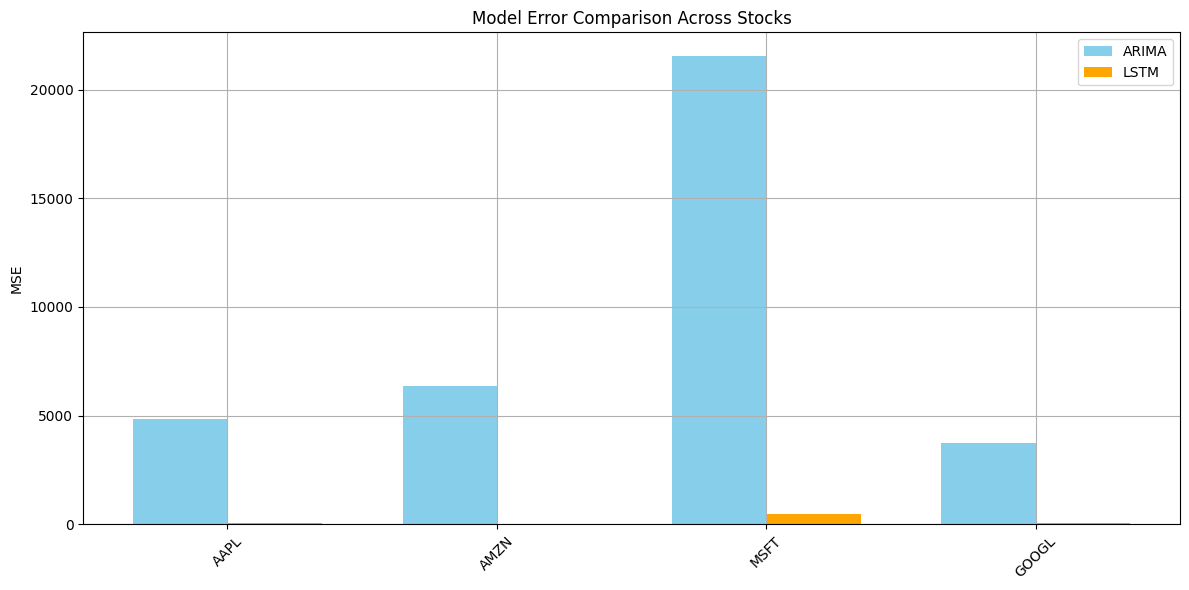

In [19]:
tickers = list(model_comparison.keys())
arima_errors = [model_comparison[t]['ARIMA_MSE'] for t in tickers]
lstm_errors = [model_comparison[t]['LSTM_MSE'] for t in tickers]

x = np.arange(len(tickers))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, arima_errors, width, label='ARIMA', color='skyblue')
plt.bar(x + width/2, lstm_errors, width, label='LSTM', color='orange')

plt.ylabel('MSE')
plt.title('Model Error Comparison Across Stocks')
plt.xticks(x, tickers, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


#**Step 10:Model Evaluation**

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
comparison_results = []

for ticker in stock_data.keys():
    # ARIMA actual vs prediction
    arima_actual = stock_data[ticker]['Close'].dropna()
    arima_test = arima_actual[int(len(arima_actual)*0.8):]
    arima_pred = arima_forecasts[ticker]

    # Align lengths
    arima_test = arima_test[:len(arima_pred)]

    # LSTM actual vs prediction
    lstm_pred = lstm_forecasts[ticker]
    lstm_actual = stock_data[ticker]['Close'].dropna()[lstm_pred.index[0]:lstm_pred.index[-1]]

    # Evaluation metrics
    mae_arima = mean_absolute_error(arima_test, arima_pred)
    mse_arima = mean_squared_error(arima_test, arima_pred)
    rmse_arima = np.sqrt(mse_arima)

    mae_lstm = mean_absolute_error(lstm_actual, lstm_pred)
    mse_lstm = mean_squared_error(lstm_actual, lstm_pred)
    rmse_lstm = np.sqrt(mse_lstm)

    # Store results
    comparison_results.append({
        'Ticker': ticker,
        'ARIMA_MAE': mae_arima,
        'ARIMA_MSE': mse_arima,
        'ARIMA_RMSE': rmse_arima,
        'LSTM_MAE': mae_lstm,
        'LSTM_MSE': mse_lstm,
        'LSTM_RMSE': rmse_lstm
    })

# Create DataFrame to display
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

  Ticker   ARIMA_MAE     ARIMA_MSE  ...   LSTM_MAE    LSTM_MSE  LSTM_RMSE
0   AAPL   63.640227   4846.494867  ...   6.513544   67.414635   8.210642
1   AMZN   70.958172   6371.801795  ...   4.521419   34.122967   5.841487
2   MSFT  132.833354  21560.381276  ...  18.866554  470.515106  21.691360
3  GOOGL   54.583029   3736.122377  ...   6.900822   66.850754   8.176231

[4 rows x 7 columns]


#**Step 11 : GRU Training**

In [34]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0295
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0014
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0012
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 9.7949e-04
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 9.4642e-04
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 9.6938e-04
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0011
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 8.8496e-04
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.8301e-04
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.0715e-04
Epoch 11/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 7.0868e-04
Epoch 12/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 8.8233e-04
Epoch 13/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 7.9363e-04
Epoch 14/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 7.2453e-04
Epoch 15/100
61/6

##GRU predictions size

In [36]:
print("y_test shape:", y_test.shape)
print("predictions shape:", predictions.shape)


y_test shape: (491,)
predictions shape: (491, 1)


##GRU Predictions

In [37]:
predictions = predictions[:len(y_test)]
mse = mean_squared_error(y_test, predictions)
print(f"GRU MSE: {mse}")

GRU MSE: 0.17298420884258287


## GRU Data visualizations

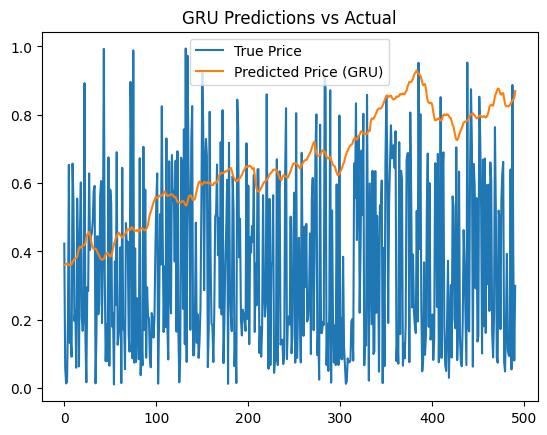

In [38]:
plt.plot(y_test, label='True Price')
plt.plot(predictions, label='Predicted Price (GRU)')
plt.legend()
plt.title("GRU Predictions vs Actual")
plt.show()